Possible Data analyses 
- Examine data and remove duplicates
- Age of officers (done)
- Race of officers (done)
- Complaints per year (done)
- Race of complaints (done)
- Age of complaints (done)
- Graph of officers most to least (done - top 20 in df)
- Graph of precints most to least (done - top 20 in df)
- Type of complaint (Graph done - percentage)
- Substantiated complaints vs unsubstantiated, description of why this is problematic to investigate your own crimes (done + percentages)(done)
- Substantiated complaints - Type of complaint (done)
- Unsubstantiated complaints - Type of complaint  
- Top 5 with complaints made against them - sub vs unsub - percentages (done) 
- Substantiated - wrt year (done)
- Substantiated male vs female + plus totals (done)
- Heatmap - correlation between race 
- Race of citizen 
- Correlation graph between race, black to white, white to black, asian to white etc 


https://www1.nyc.gov/site/ccrb/policy/data-transparency-initiative-mos.page#complaint_sub

https://gothamist.com/news/nypd-police-ccrb-database-shows-confirmed-record-misconduct

This report needs to be split into three parts 
part 1 = exploratory analysis of all allegations 
part 2 = Explanation of police investigation their own crimes 
part 3 = Substantiated allegations and complaints 



In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


In [2]:
nypd_allegations = pd.read_csv("/Users/jordan/Documents/GitHub/NYPD_allegations/allegations.csv")

#A snapshot of the data.
nypd_allegations.head(3)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


In [3]:
nypd_allegations.describe()

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,28546.000000,33334.000000
mean,18169.912495,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.484201,64.365213
std,9566.316896,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,28.408963,31.451592
min,2.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,-4301.000000,0.000000
25%,9671.000000,13684.750000,3.000000,2007.000000,4.000000,2008.000000,28.000000,23.000000,43.000000
50%,19215.000000,25132.000000,6.000000,2012.000000,6.000000,2013.000000,31.000000,30.000000,67.000000
75%,25412.000000,34252.000000,9.000000,2016.000000,9.000000,2016.000000,36.000000,41.000000,81.000000
max,36374.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


In [4]:
#When isolating a single officer to check duplicates

officer_example = nypd_allegations[nypd_allegations["unique_mos_id"] == 9984] 
officer_example

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
33345,9984,Hassan,Paris,078 PCT,9410,6,2005,9,2005,078 PCT,...,26,Hispanic,Male,27.0,Force,Physical force,78.0,Parking violation,Parking summons issued,Unsubstantiated
33346,9984,Hassan,Paris,078 PCT,9410,6,2005,9,2005,078 PCT,...,26,Hispanic,Male,27.0,Abuse of Authority,Threat of arrest,78.0,Parking violation,Parking summons issued,Exonerated
33347,9984,Hassan,Paris,078 PCT,9410,6,2005,9,2005,078 PCT,...,26,Hispanic,Male,27.0,Discourtesy,Word,78.0,Parking violation,Parking summons issued,Unsubstantiated
33348,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
33349,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Threat of summons,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated
33350,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Threat of arrest,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated
33351,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Property damaged,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated


The above code attemps to discover duplicates in the data. What is evident here is that althought dates, mos_id, names and complaint_id are identical, it is clear that the individual lodging the complain has put forward multiple allegations under the same incident. An example above indicates that under one incident the officer was alleged under the following complaints, abuse of authority and discourtesy in the same incident. Note that there are still substantiated, exonerated and unsubstantiated complaints within this dataset. 

In [5]:
#Check duplicates of columns 

#duplicates have been deleted from the df 
total_clean = nypd_allegations[nypd_allegations[['first_name', 'last_name', 'complaint_id','allegation']].duplicated() == False]

clean1_count_row = total_clean.shape[0]

clean1_count_row

31374

Data cleaning 1 - This script removes duplicates by using a combination of the first_name, last_name, complaint_id and allegation. Using these tags we can ensure duplicate data among rows is eliminated from the dataset. 

In [6]:
#Isolate duplicates to be potentially used later. 

#Isolate duplicates
duplicates = nypd_allegations[nypd_allegations[['first_name', 'last_name', 'complaint_id','allegation']].duplicated() == True]

#Find out how many duplicates have been deleted. 
duplicates_count = duplicates.shape[0]

duplicates_count


1984

This demonstrates that there are 1984 rows in this data set that are duplicate events, involving identical, first_name, last_name, complaint_id and allegation. 

In [7]:
#Age of offending officer changes drastically when cleaned dataset is used. With the data removed. 

#WHY!? Need to remove duplicate data that has duplicates of names, MOS_ID, Complaint_ID and Allegation 

# Why is this data frame so low - will it be better using data_clean?

<IPython.core.display.Javascript object>


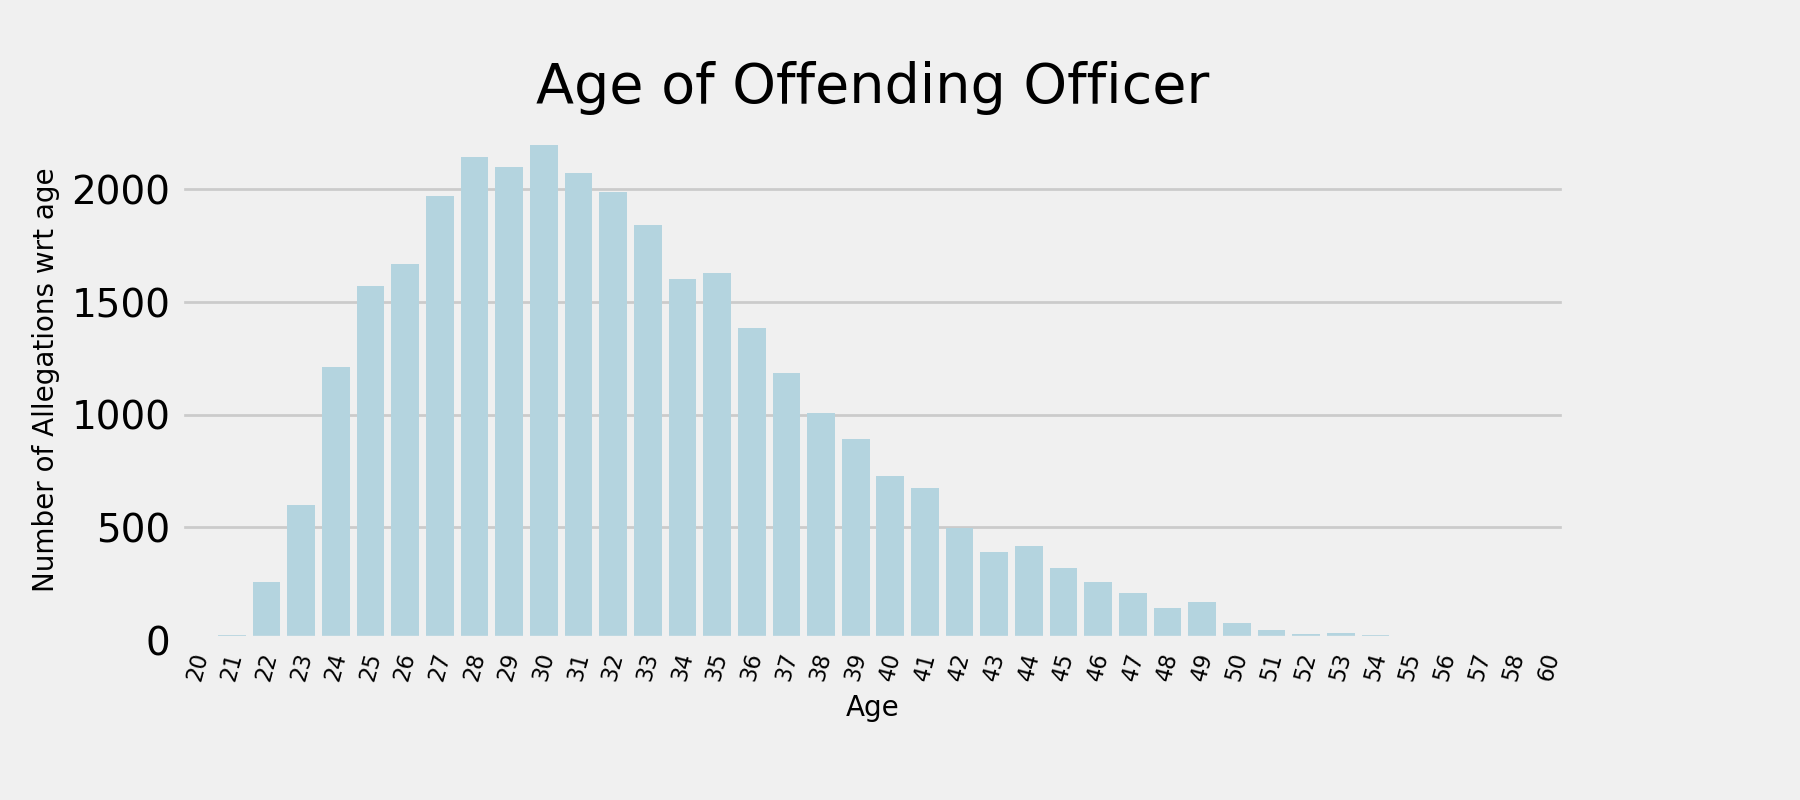

/Users/jordan/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Allegations wrt age')

In [8]:
#age of officers - breakdown 
#plt.figure(1)
#Remove any ages that do not have have ages 
nypd_allegations_cleaned = total_clean[total_clean.mos_age_incident != '(null)']
#ensure that mos_age_incident is an int
off_age_clean = pd.to_numeric(nypd_allegations_cleaned['mos_age_incident'])

#Plotting histogram
plt.style.use('fivethirtyeight')


plt.figure(figsize=(9,4))
sns.countplot(off_age_clean.astype(int),color ='lightblue')
plt.title("Age of Offending Officer", fontsize = 20)
plt.xlabel('Age', fontsize = 10)

plt.xticks(fontsize = 8, rotation = 75)

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.87, top=0.85)
plt.ylabel('Number of Allegations wrt age', fontsize = 10)

In [9]:
# Race of officers - Graph 
OfficerEthnicity = total_clean['mos_ethnicity']
RaceValue = OfficerEthnicity.unique()

RaceCount = OfficerEthnicity.value_counts()
RaceCount

White              16991
Hispanic            8625
Black               4631
Asian               1097
American Indian       30
Name: mos_ethnicity, dtype: int64

In [10]:
# Race of officers - Graph 
OfficerEthnicity = nypd_allegations['mos_ethnicity']
RaceValue = OfficerEthnicity.unique()

RaceCount = OfficerEthnicity.value_counts()
RaceCount

White              18074
Hispanic            9150
Black               4924
Asian               1178
American Indian       32
Name: mos_ethnicity, dtype: int64

<IPython.core.display.Javascript object>


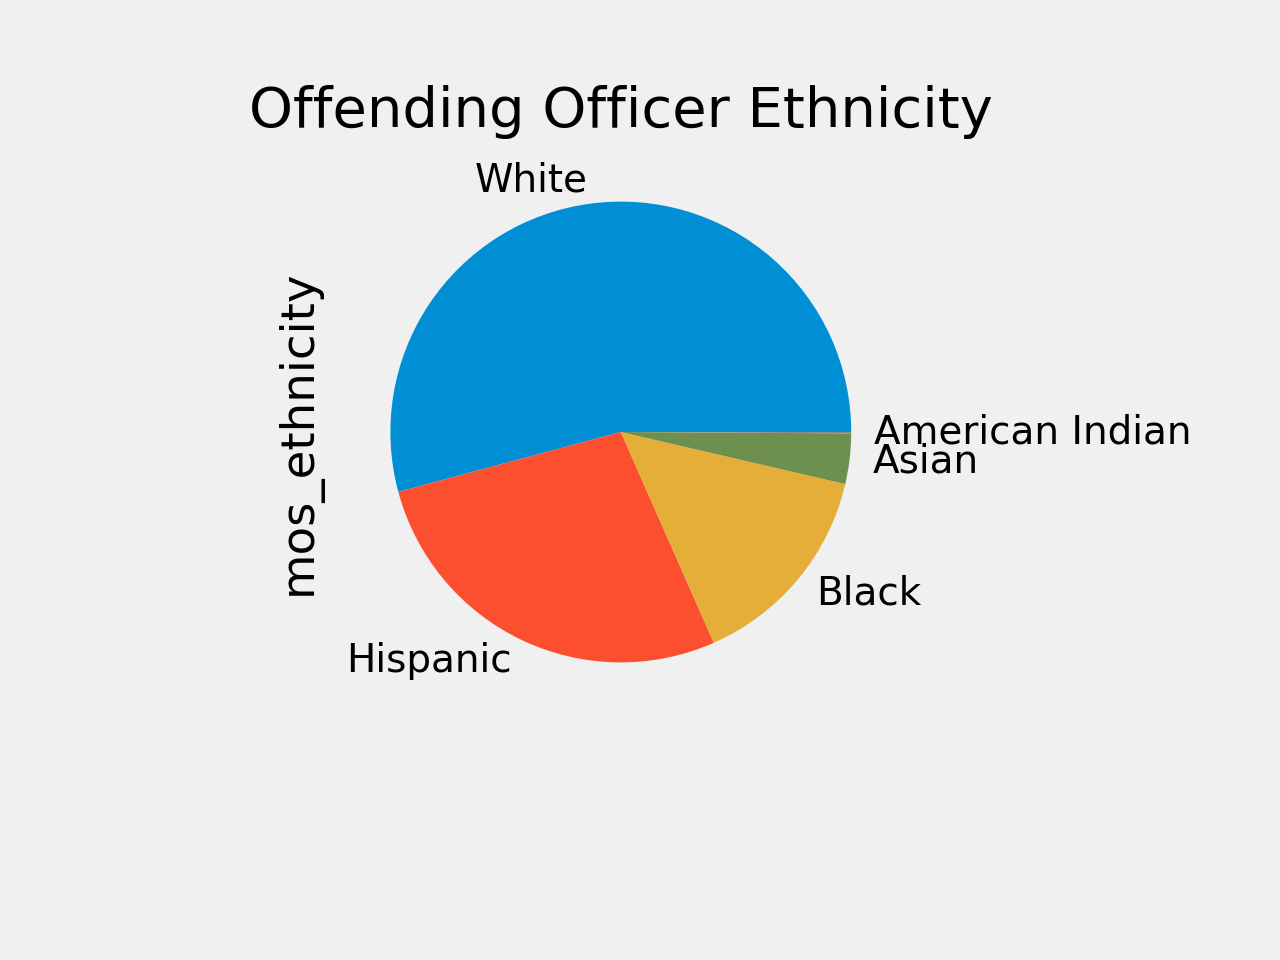

Text(0.5, 1.0, 'Offending Officer Ethnicity')

In [11]:
#This graph below details the ethnicity of the Police Officer who is receiving the complaint.
plt.figure(2)
nypd_allegations['mos_ethnicity'].value_counts().plot(kind='pie')
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)
explode = (0, 0.05, 0.1, 0.15, 0.2)
plt.title('Offending Officer Ethnicity')


<IPython.core.display.Javascript object>


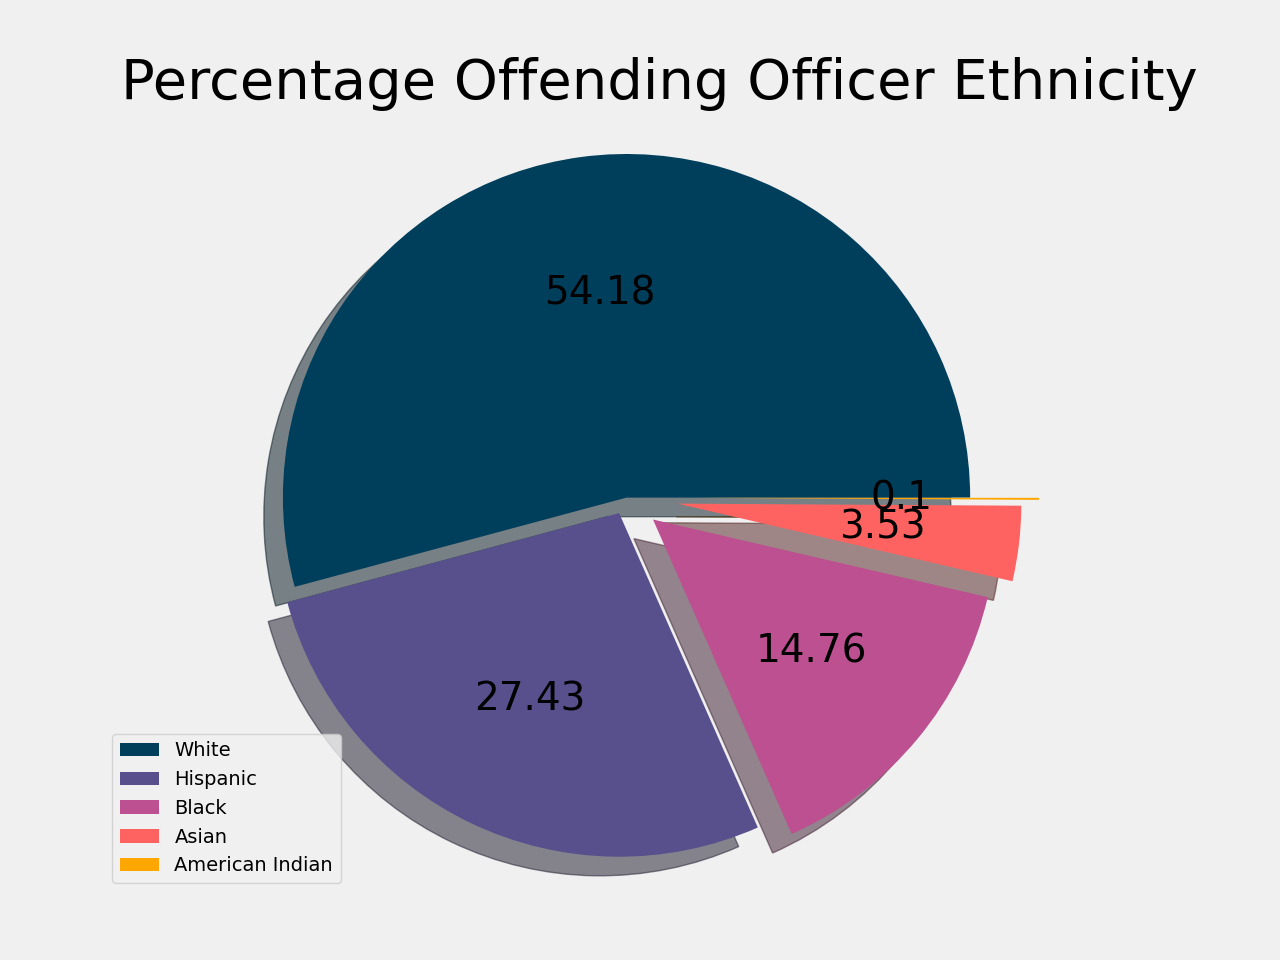

In [12]:
#This graph is a breakdown of the race of the officer receiving the complaint. 
#Please note that these are unique complaints. 
#Many officers received multiple complaints during their employment. 
#This will be covered later in this portfolio.

suspect_ethnicity = nypd_allegations['mos_ethnicity']
ethnicity_count = suspect_ethnicity.value_counts()
ethnicity_value = suspect_ethnicity.unique()
total_rows = len(nypd_allegations)

plt.figure(3)
labels = ethnicity_value
#sizes = nypd_allegations['mos_ethnicity'].value_counts().sort_index() / total_rows*100
sizes = ((ethnicity_count / total_rows) * 100)
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
explode = (0, 0.05, 0.1, 0.15, 0.2)
plt.pie(sizes, colors=colors,
        autopct=absolute_value, shadow=True, explode=explode)
plt.title('Percentage Offending Officer Ethnicity')

plt.legend(labels=ethnicity_count.index,loc=3, prop={'size': 7})


plt.axis('equal')
plt.show()


In [13]:
#This will contain male female comparison - percentage 
#Isolate values of sex count for the data set 

In [14]:
# Gender of Member of Service
OfficerGender = nypd_allegations['mos_gender']
GenderValue = OfficerGender.unique()

GenderCount = OfficerGender.value_counts()
GenderCount


M    31598
F     1760
Name: mos_gender, dtype: int64

<IPython.core.display.Javascript object>


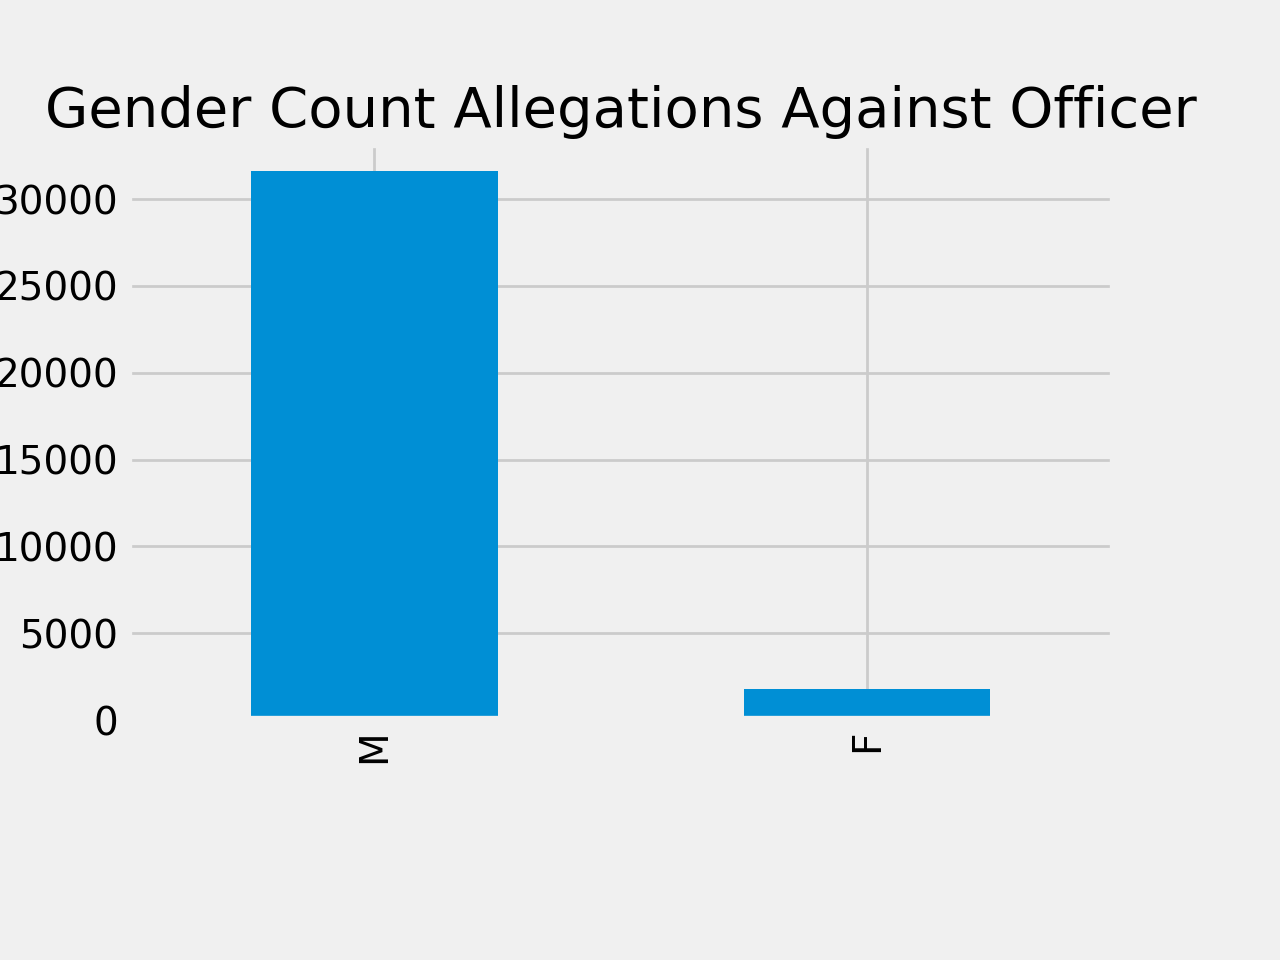

Text(0.5, 1.0, 'Gender Count Allegations Against Officer')

In [15]:
#This graph below details the Gender of the Police Officer who is receiving the complaint.
plt.figure(4)
nypd_allegations['mos_gender'].value_counts().plot(kind='bar')
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)
plt.title('Gender Count Allegations Against Officer')

In [16]:
#This will calculate the percentage of male vs female officer complaints - needs to be compared with 

totalcount = len(nypd_allegations.index)
gender = nypd_allegations['mos_gender'].value_counts()

malepercent = (gender.iloc[0]/totalcount)*100
femalepercent = (gender.iloc[1]/totalcount)*100
print(malepercent)
print(femalepercent)

94.72390431081
5.27609568919


As of 02/02/2021, the gender breakdown of the NYPD police force is 81% Male (28,382) and 19% Female (6,578). If allegation rates were consistent with the population of police officers the rate of allegations should be similar to the gender breakdown of the force. As the comparison between these two data sets reveals, this is not the case. 

https://www1.nyc.gov/site/ccrb/policy/data-transparency-initiative-mos.page

As a comparison - we can see the breakdown of these complaints and see if they can be compared with gender demographics 

In [17]:
#this comparison will not work as the complaints are across multiple years 
#need that male female comparison over the average per year with regard to total number of men and woe

In [18]:
#The following graph will give a breakdown of each year 

#Groupby and count the amount of allegations per year
date = nypd_allegations.groupby(nypd_allegations['year_received']).count()
#select first two columns of data frame using index (iloc)
date = date.iloc[:, 0:1]
#Reset column 1 to title of the column
date.reset_index(inplace=True)


<IPython.core.display.Javascript object>


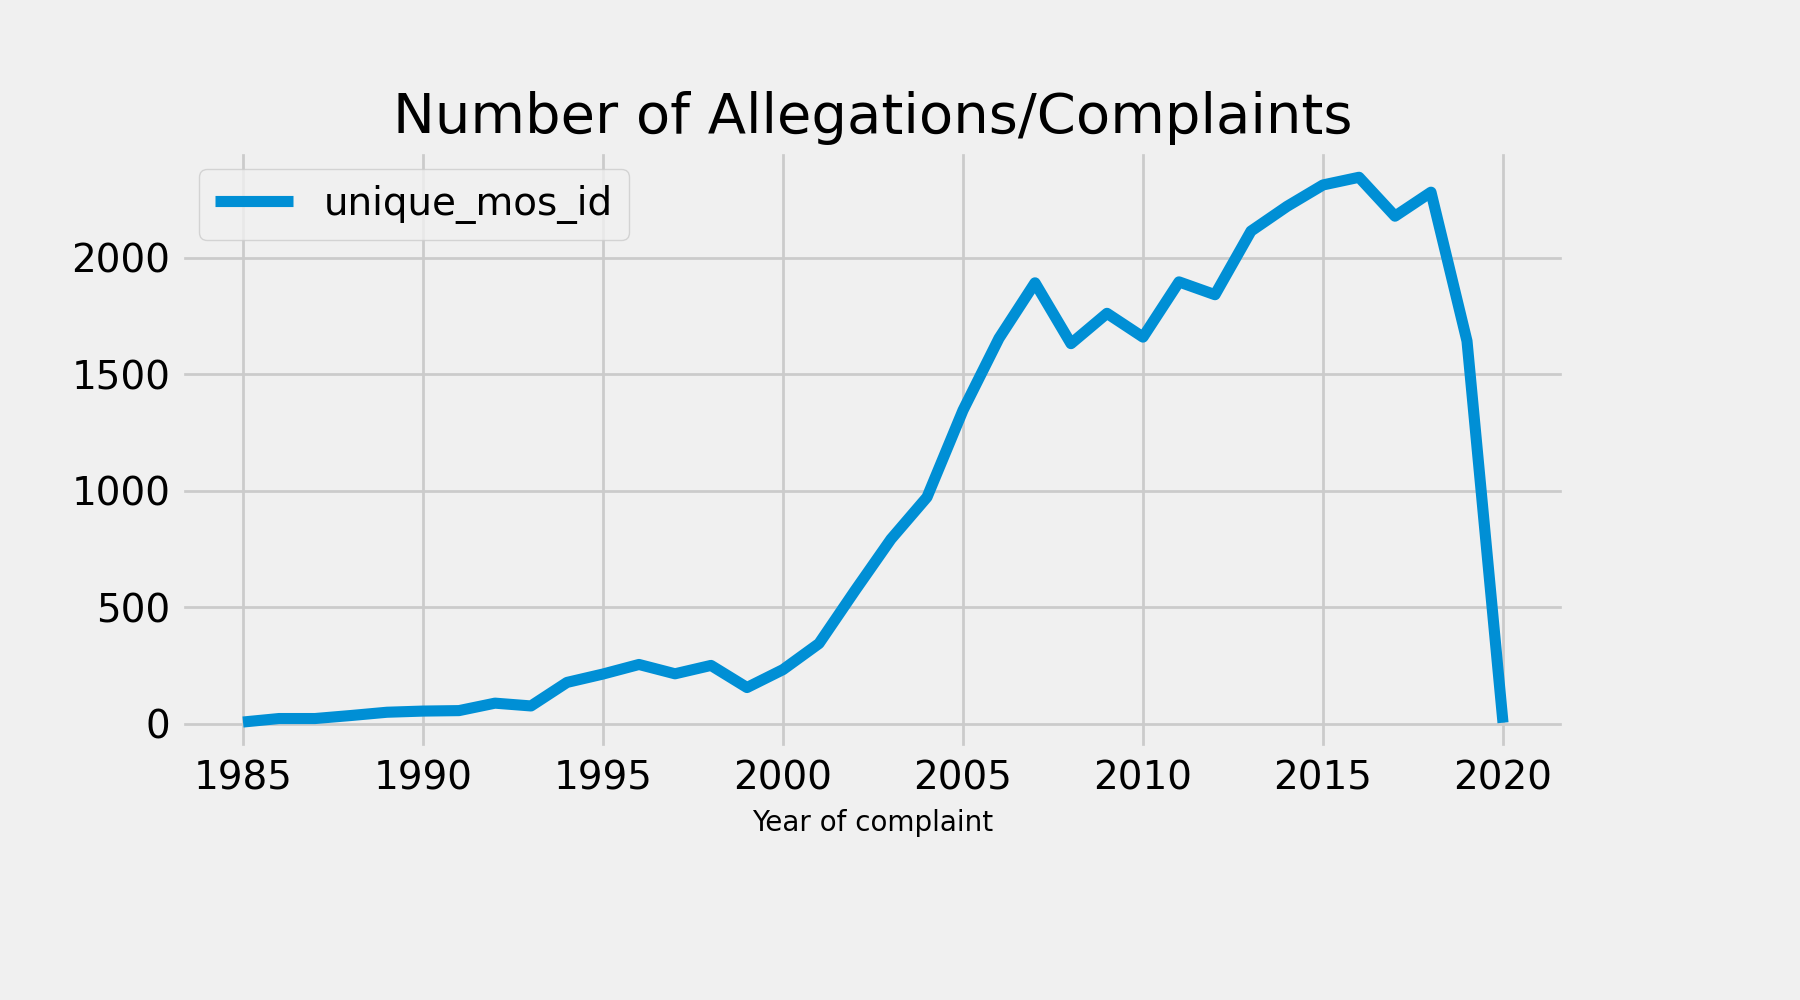

In [19]:



date.set_index('year_received').plot(figsize=(9,5), grid=True)
plt.title('Number of Allegations/Complaints')
plt.xlabel('Year of complaint', fontsize = 10)
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)


In [21]:
#find the top 20 worst offenders - 

#Isolate three columns 
mosId = nypd_allegations.iloc[:, 0:3]
#Groupby to find total complaints of a single officer 
mosId = mosId.groupby(mosId.columns.tolist()).size().reset_index().\
    rename(columns={0:'total'})
#Sort by total column of 
Id_sort = mosId.sort_values('total',ascending = False)
Id_sort.reset_index(drop=True, inplace=True)
Idsort = Id_sort.head(20)
#Prints to markdown cell 
print(Idsort.to_markdown())

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [22]:
#Reference and isolate column detailing precinct 
PrecinctTotal = nypd_allegations.iloc[:, 22].to_frame()

#Groupby to find total complaints of each precinct, create new column with total
PrecinctTotal = PrecinctTotal.groupby(PrecinctTotal.columns.tolist()).size().reset_index().\
    rename(columns={0:'total'})

PrecinctTotal  = PrecinctTotal .sort_values('total',ascending = False)
PrecinctTotal.reset_index(drop=True, inplace=True)
PrecinctTotal = PrecinctTotal .head(20)
#Prints to markdown cell 
print(PrecinctTotal.to_markdown())

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [23]:
#Substantiated vs Unsubstansitated complaints - and the problematic issues that arise from
#investigating your own crimes as a police force 

#Isolate column to get an idea of what the string will look like.
#We need to isolate the first word 

SubVsUn = nypd_allegations['board_disposition']
SubVsUn.head()

0    Substantiated (Command Lvl Instructions)
1                     Substantiated (Charges)
2                     Substantiated (Charges)
3                     Substantiated (Charges)
4        Substantiated (Command Discipline A)
Name: board_disposition, dtype: object

<IPython.core.display.Javascript object>


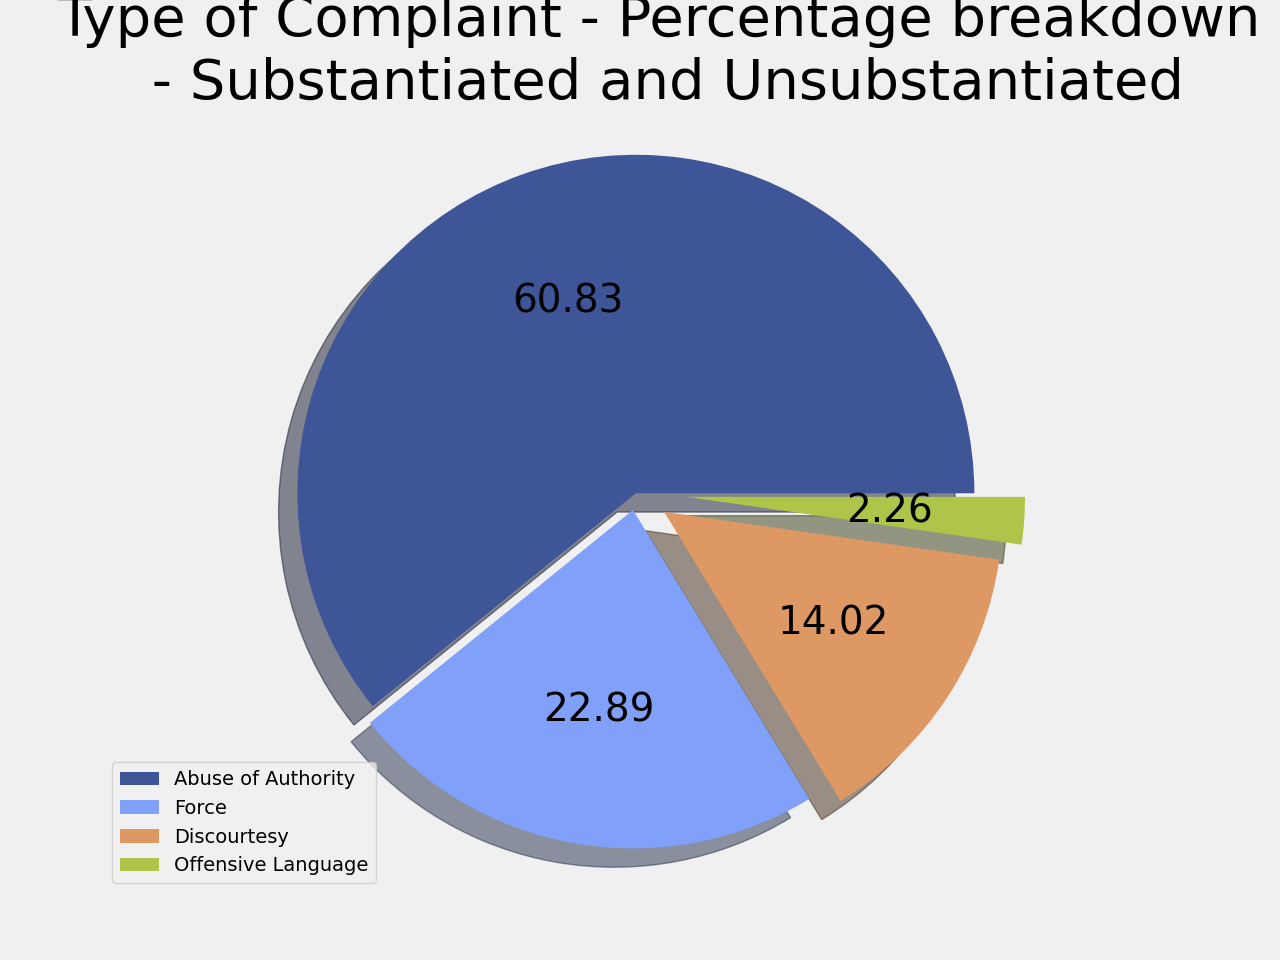

In [24]:
#Percentage Breakdown of Complaints - Substantiated and Unsubstantiated 

#Type of complaint - 

type_complaint = nypd_allegations['fado_type'].value_counts()
type_complaint


type_complaint = nypd_allegations['fado_type']
type_complaint_count = type_complaint.value_counts()
type_complaint_value = type_complaint.unique()
total_rows = len(nypd_allegations)

plt.figure(7)
labels = type_complaint_value
#sizes = nypd_allegations['mos_ethnicity'].value_counts().sort_index() / total_rows*100
sizes = ((type_complaint_count / total_rows) * 100)
colors = ['#3e5698', '#80a0fa', '#de9864', '#aec549']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
explode = (0, 0.05, 0.1, 0.15)
plt.pie(sizes, colors=colors,
        autopct=absolute_value, shadow=True, explode=explode)
plt.title('Type of Complaint - Percentage breakdown\n - Substantiated and Unsubstantiated')

plt.legend(labels=type_complaint_count.index,loc=3, prop={'size': 7})


plt.axis('equal')
plt.show()

In [25]:
#Extract the first word from the column labeled board disposition - BEWARE THIS CODE IS SLOW

# SubUnsub = [nypd_allegations.board_disposition.str.split(' ')[index][0]
#              for index in range(0, len(nypd_allegations))]
# #print(SubUnsub)

# #Print to string, next, count instances of Substantiated and Unsubstantiated
# #initialise variables 
# word1 = "Substantiated"
# word2 = "Unsubstantiated"

# #Count instances of substantiated and unsubstantiated in the column
# count1 = SubUnsub.count(word1)
# count2 = SubUnsub.count(word2)


In [26]:
# Intialise data of lists - print this to data frame and save as CSV because the above code is slow
# Join ints together in one df
# data = {'Substantiated':[count1],
#         'Unsubstantiated':[count2]}
  
# # Create DataFrame
# SubUnsubdf = pd.DataFrame(data)
  
# # Print the output to csv because the above code is super slow 
# SubUnsubdf.to_csv('SubUnsubdf.csv')

In [27]:
# Import CSV with data on substantiated vs unsubstantiated 
SubUnsub = pd.read_csv("/Users/jordan/Documents/GitHub/NYPD_allegations/SubUnsubdf.csv")
#drop column 1 which was redundant 
SubUnsub.drop(['Unnamed: 0'], axis =1)

,Substantiated,Unsubstantiated
0,8301,15448


In [28]:
#need to find percentage of substantiated wrt unsub 
sub = SubUnsub['Substantiated']
unsub = SubUnsub['Unsubstantiated']

subpercentage = (sub / ((sub + unsub))*100)
print(subpercentage)
ubsubpercentage = (unsub / ((sub + unsub))*100)
print(ubsubpercentage)

0    34.953051
dtype: float64
0    65.046949
dtype: float64


<IPython.core.display.Javascript object>


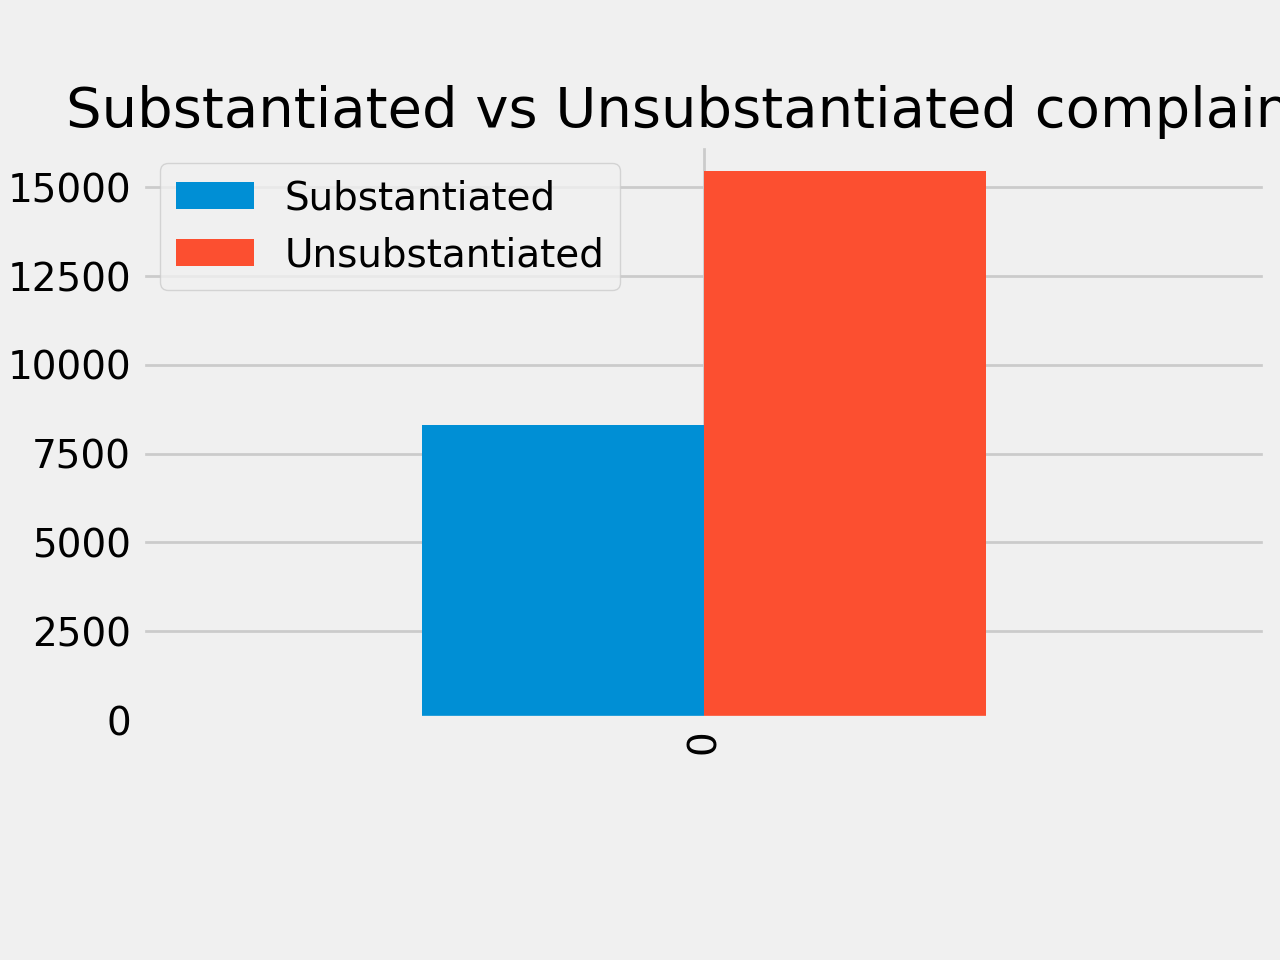

In [29]:
# Keep in mind, the complexity behind the NYPD investigating their own complaints
plt.figure(5)
SubUnsub[['Substantiated','Unsubstantiated']].plot(kind='bar')
plt.title('Substantiated vs Unsubstantiated complaints')
plt.subplots_adjust(left=0.11, bottom=0.25, right=0.99, top=0.85)
plt.show()

In [30]:
#Top 5 with complaints made against them - sub vs unsub 

cols = [0,1,2,25]
mosIdsub = nypd_allegations[nypd_allegations.columns[cols]]


sbarra = mosIdsub[mosIdsub["unique_mos_id"] == 18731]
Reich = mosIdsub[mosIdsub["unique_mos_id"] == 25861]
Messina = mosIdsub[mosIdsub["unique_mos_id"] == 19489]
Mccormack = mosIdsub[mosIdsub["unique_mos_id"] == 18589]
Cheesewright= mosIdsub[mosIdsub["unique_mos_id"] == 22775]


In [31]:
SbarraSub = sbarra.board_disposition.str.count("Substantiated").sum() / (len(sbarra.index))*100
ReichSub = Reich.board_disposition.str.count("Substantiated").sum() / (len(Reich.index))*100
MessinaSub = Messina.board_disposition.str.count("Substantiated").sum() / (len(Messina.index))*100
MccormackSub = Mccormack.board_disposition.str.count("Substantiated").sum() / (len(Mccormack.index))*100
CheesewrightSub = Cheesewright.board_disposition.str.count("Substantiated").sum() / (len(Cheesewright.index))*100


In [32]:
top5df = {'Name': ['Sbarra','Reich','Messina','Mccormack','Cheesewright'], 
          'Percentage of substantiated': [SbarraSub,ReichSub,MessinaSub,
                                          MccormackSub, CheesewrightSub]}

top5 = pd.DataFrame(data=top5df)

In [33]:
top5

,Name,Percentage of substantiated
0,Sbarra,21.333333
1,Reich,9.333333
2,Messina,8.219178
3,Mccormack,22.222222
4,Cheesewright,25.396825


https://www1.nyc.gov/site/ccrb/investigations/case-outcomes.page

In [34]:
#Need to combine these two to show all substantiated complaints from all officers 
filter_list = ['Substantiated (Charges)', 'Substantiated (Command Discipline)',
               'Substantiated (Formalized Training)','Substantiated (Command Lvl Instructions)',
               'Substantiated (Command Discipline A)','Substantiated (Command Discipline B)','Substantiated (Instructions)',
               'Substantiated (MOS Unidentified)','Substantiated (No Recommendations)']
substantiated_complaints = nypd_allegations[nypd_allegations.board_disposition.isin(filter_list)]

substantiated_complaints

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,26146,7,2012,9,2013,PBBS,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,40253,8,2018,2,2019,078 PCT,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33344,9979,Novaidul,Neon,078 PCT,36320,12,2016,5,2017,094 PCT,...,38,White,Male,35.0,Abuse of Authority,Other,94.0,EDP aided case,No arrest made or summons issued,Substantiated (Formalized Training)
33348,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
33355,9992,Tomasz,Pulawski,078 PCT,35671,8,2016,2,2017,066 PCT,...,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,35671,8,2016,2,2017,066 PCT,...,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


In [35]:
#Isolate substantiated complaints and plot on graph 


substantiated_type_complaint = substantiated_complaints['fado_type']
substantiated_type_complaint_count = substantiated_type_complaint.value_counts()
substantiated_type_complaint_value = substantiated_type_complaint.unique()
total_rows_sub = len(substantiated_complaints)

<IPython.core.display.Javascript object>


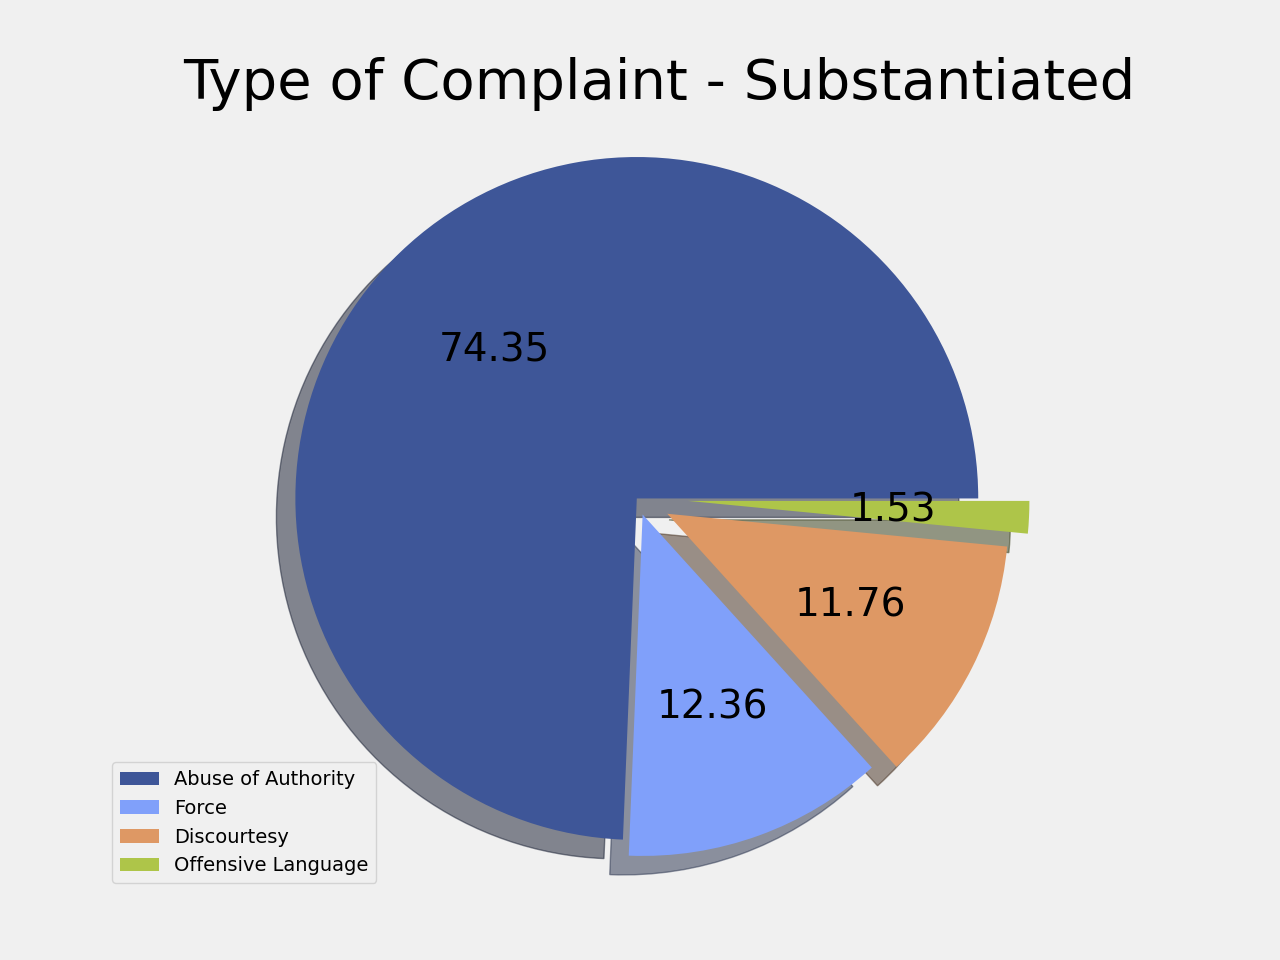

In [36]:
plt.figure(9)
labels = substantiated_type_complaint_value
#sizes = nypd_allegations['mos_ethnicity'].value_counts().sort_index() / total_rows*100
sizes = ((substantiated_type_complaint_count / total_rows_sub) * 100)
colors = ['#3e5698', '#80a0fa', '#de9864', '#aec549']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
explode = (0, 0.05, 0.1, 0.15)
plt.pie(sizes, colors=colors,
        autopct=absolute_value, shadow=True, explode=explode)
plt.title('Type of Complaint - Substantiated')

plt.legend(labels=type_complaint_count.index,loc=3, prop={'size': 7})


plt.axis('equal')
plt.show()



<IPython.core.display.Javascript object>


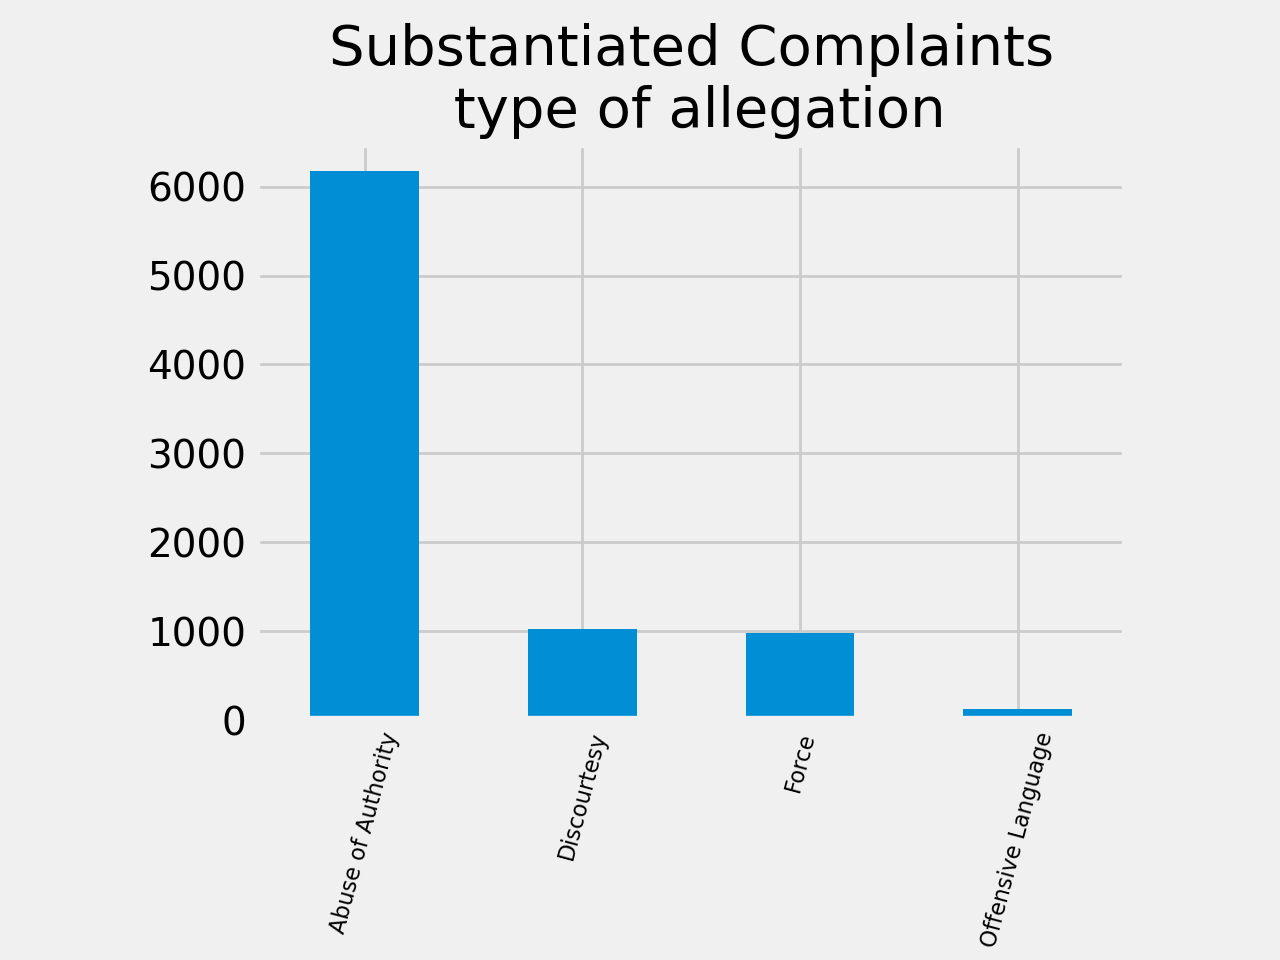

Text(0.5, 1.0, 'Substantiated Complaints\n type of allegation')

In [37]:
#Substantiated fado_type column graph 
plt.figure(10)
substantiated_complaints['fado_type'].value_counts().plot(kind='bar')
plt.subplots_adjust(left=0.2, bottom=0.25, right=0.88, top=0.85)
plt.xticks(fontsize = 8, rotation = 75)
plt.title('Substantiated Complaints\n type of allegation')

<IPython.core.display.Javascript object>


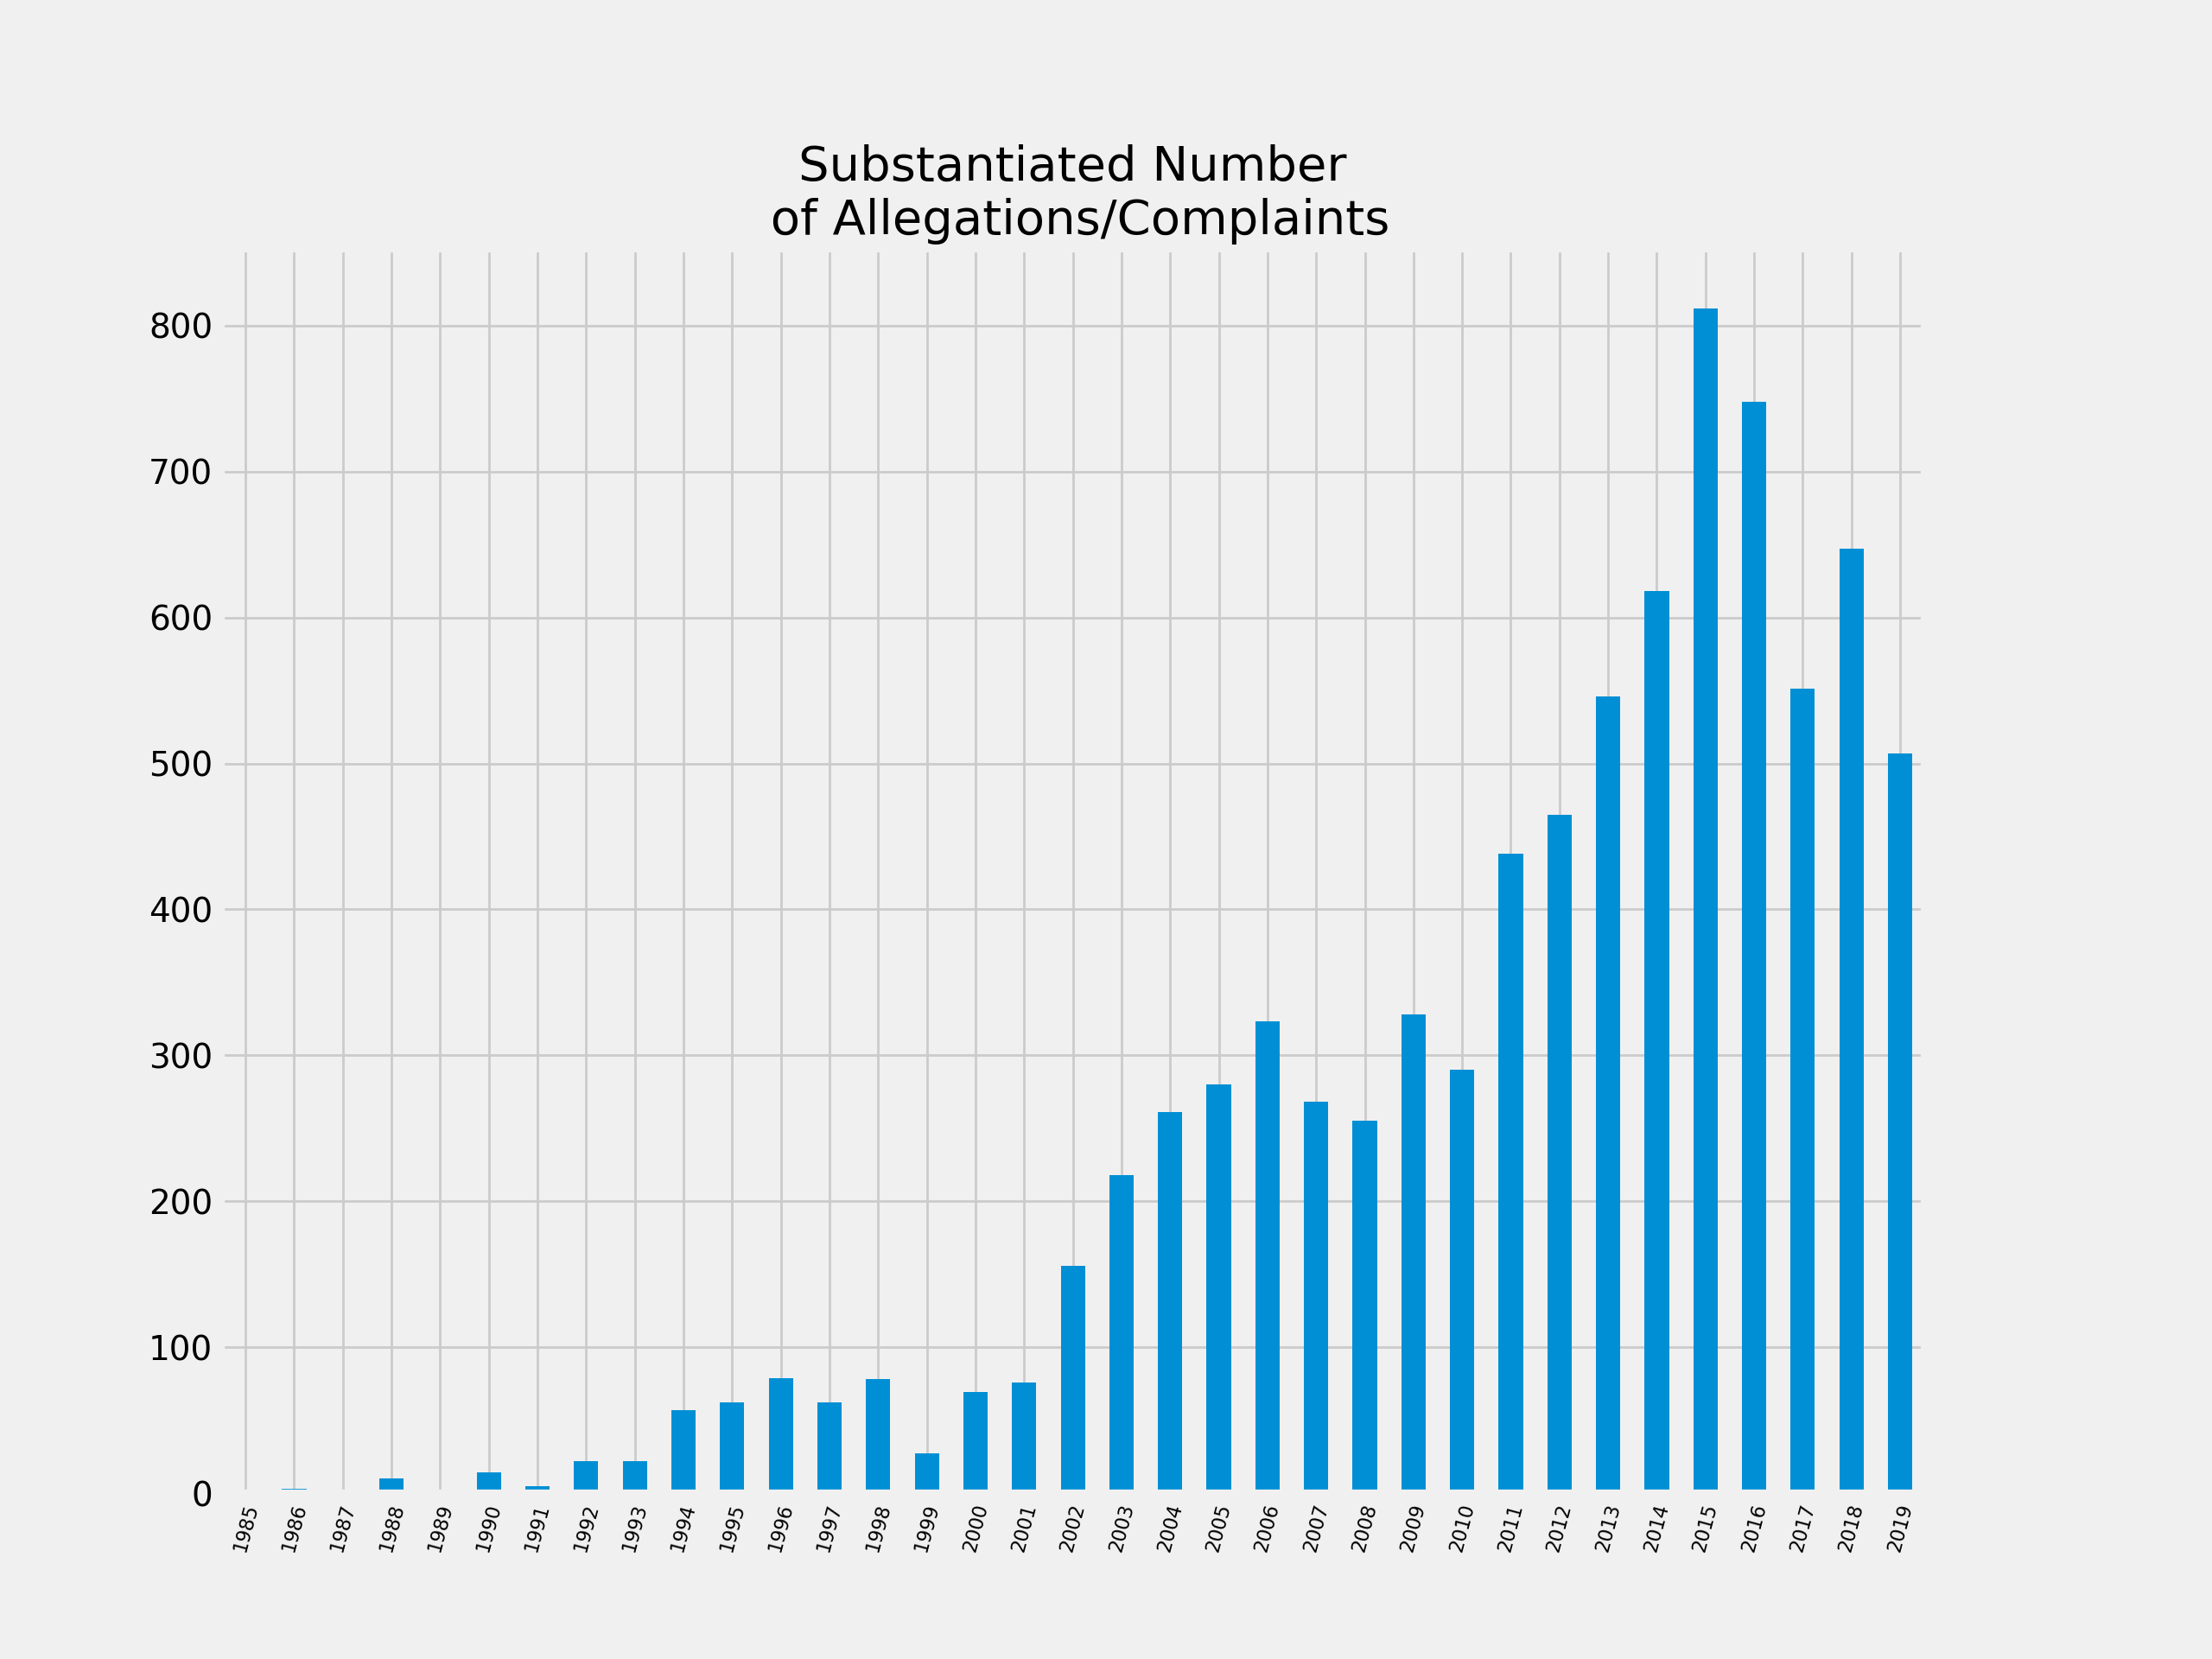

Text(0.5, 1.0, 'Substantiated Number\n of Allegations/Complaints')

In [38]:
#- Substantiated - wrt year (to see if there are more substantiated complaints now than before) 
plt.figure(11)
substantiated_complaints['year_received'].value_counts().sort_index().plot(kind='bar')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.87, top=0.85)
plt.xticks(fontsize = 8, rotation = 75)


plt.title('Substantiated Number\n of Allegations/Complaints')

In [39]:
sub_m_w= substantiated_complaints['mos_gender'].value_counts()
sub_m_w

M    7667
F     634
Name: mos_gender, dtype: int64

<IPython.core.display.Javascript object>


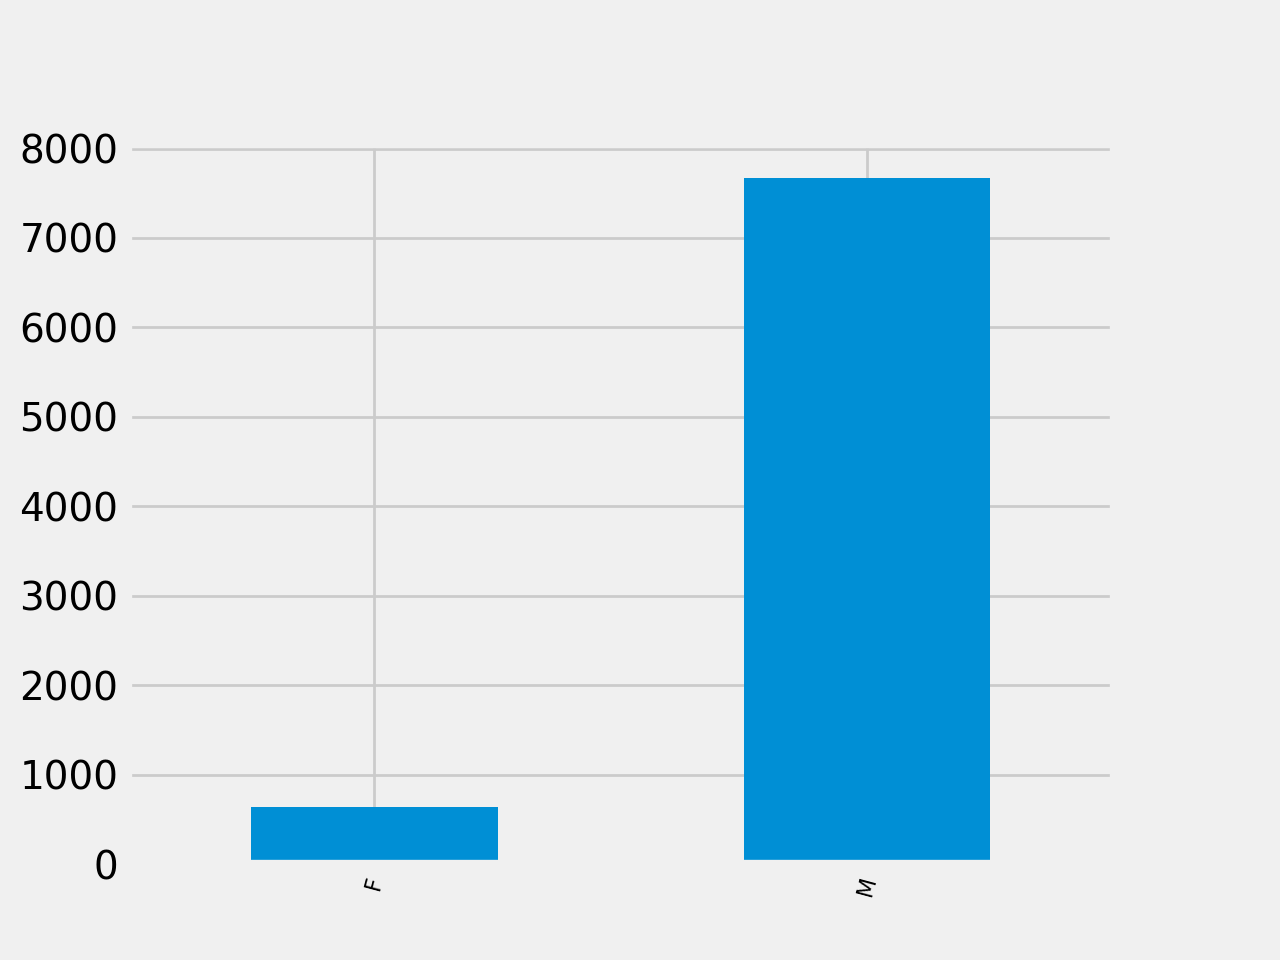

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

In [58]:
#- Substantiated male vs female 

plt.figure(12)
substantiated_complaints['mos_gender'].value_counts().sort_index().plot(kind='bar')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.87, top=0.85)
plt.xticks(fontsize = 8, rotation = 75)




In [50]:
#Correlation - between ethnicity of complainant and officer ethnicity 

RaceCorrelation = nypd_allegations[['mos_ethnicity', 'complainant_ethnicity']]
#RaceCorrelation.corr()
#plt.figure(13)
#sns.heatmap(RaceCorrelation.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


In [ ]:
#corr with - df column A and df column b 

In [65]:
plt.figure(14)
sns.heatmap(RaceCorrelation.corr());
plt.subplots_adjust(left=0.15, bottom=0.5, right=0.9, top=0.85)



<IPython.core.display.Javascript object>


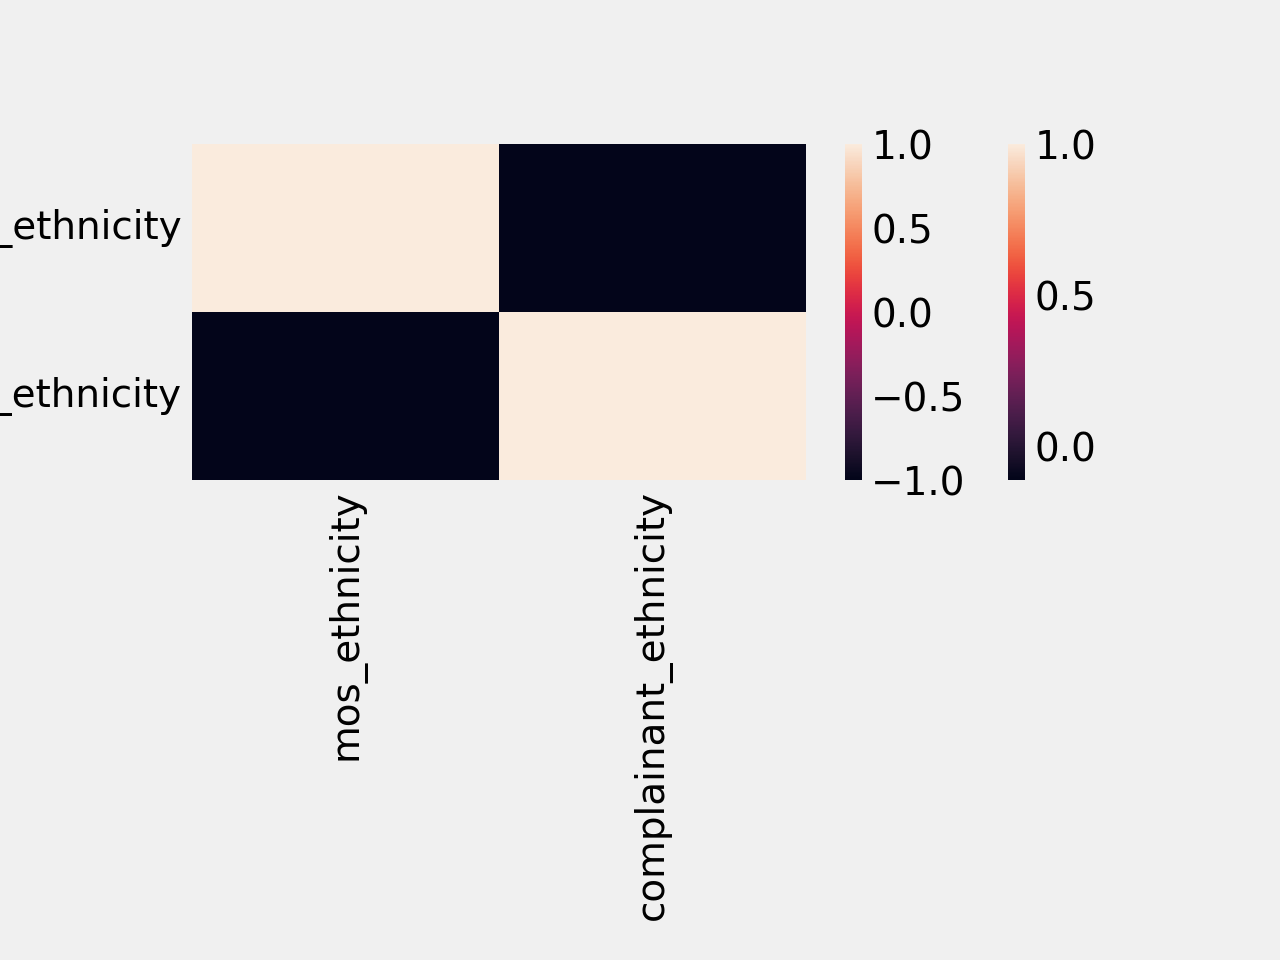

/var/folders/5w/j1lwzvsn2wqcnrhw343p9vd00000gn/T/ipykernel_23742/937755006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RaceCorrelation['mos_ethnicity']=RaceCorrelation['mos_ethnicity'].astype('category').cat.codes
/var/folders/5w/j1lwzvsn2wqcnrhw343p9vd00000gn/T/ipykernel_23742/937755006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RaceCorrelation['complainant_ethnicity']=RaceCorrelation['complainant_ethnicity'].astype('category').cat.codes


In [63]:
plt.figure(14)
#correlation matrix between races 
RaceCorrelation = nypd_allegations[['mos_ethnicity', 'complainant_ethnicity']]



RaceCorrelation['mos_ethnicity']=RaceCorrelation['mos_ethnicity'].astype('category').cat.codes
RaceCorrelation['complainant_ethnicity']=RaceCorrelation['complainant_ethnicity'].astype('category').cat.codes
RaceCorrelation = RaceCorrelation.corr()

In [ ]:
RaceCorrelation

In [ ]:
plt.figure(8)
sns.heatmap(RaceCorrelation.corr());